O programa Psi4 apresenta um módulo chamado de FISAPT (Functional Group Intra or Intermolecular SAPT) que permite (1) particionar os vários termos SAPT em grupos funcionais químicos localizados (F-SAPT) e (2) uma maneira de computar a interação SAPT entre dois fragmentos dentro de uma molécula (I-SAPT).
O F-SAPT foi desenvolvido para obter mais informações sobre as origens químicas de uma interação não covalente, enquanto que I-SAPT permite realziar uma análise SAPT para interações não-covalentes intramoleculares.

Neste laboratório você irá empregar estes módulos em dois sistemas simples como prova de conceito. O primeiro deles é um dímero de fenol, cuja estrutura molecular é mostrada abaixo:

<div>
<img src="phenol_dimer.png" width="600"/>
</div>

No meu computador este cálculo levou cerca de 4 minutos.

In [1]:
import sys; sys.path.append("/usr/lib/x86_64-linux-gnu/") 
import time
import numpy as np
import scipy
from scipy.optimize import *
np.set_printoptions(precision=5, linewidth=200, threshold=2000, suppress=True)
import psi4
import matplotlib.pyplot as plt


# Set Psi4 & NumPy Memory Options
psi4.set_memory('4 GB')
psi4.core.set_output_file('output.dat', False)

numpy_memory = 2

psi4.set_options({'basis': 'jun-cc-pVDZ',
              'scf_type': 'df',
              'guess': 'sad',
              'reference': 'rhf',
              'fisapt_charge_completeness': 0.8,
              'freeze_core': 'True'})


  Memory set to   3.725 GiB by Python driver.


In [2]:
psi4.set_options({'basis': 'jun-cc-pVDZ',
              'scf_type': 'df',
              'guess': 'sad',
              'reference': 'rhf',
              'freeze_core': 'True'})
#geometria do dimero de fenol
phenol_dimer =  """
0 1
O    -1.3885044    1.9298523   -0.4431206
H    -0.5238121    1.9646519   -0.0064609
C    -2.0071056    0.7638459   -0.1083509
C    -1.4630807   -0.1519120    0.7949930
C    -2.1475789   -1.3295094    1.0883677
C    -3.3743208   -1.6031427    0.4895864
C    -3.9143727   -0.6838545   -0.4091028
C    -3.2370496    0.4929609   -0.7096126
H    -0.5106510    0.0566569    1.2642563
H    -1.7151135   -2.0321452    1.7878417
H    -3.9024664   -2.5173865    0.7197947
H    -4.8670730   -0.8822939   -0.8811319
H    -3.6431662    1.2134345   -1.4057590
--
0 1
O     1.3531168    1.9382724    0.4723133
H     1.7842846    2.3487495    1.2297110
C     2.0369747    0.7865043    0.1495491
C     1.5904026    0.0696860   -0.9574153
C     2.2417367   -1.1069765   -1.3128110
C     3.3315674   -1.5665603   -0.5748636
C     3.7696838   -0.8396901    0.5286439
C     3.1224836    0.3383498    0.8960491
H     0.7445512    0.4367983   -1.5218583
H     1.8921463   -1.6649726   -2.1701843
H     3.8330227   -2.4811537   -0.8566666
H     4.6137632   -1.1850101    1.1092635
H     3.4598854    0.9030376    1.7569489

symmetry c1
no_reorient
no_com
  
"""
# constroi a molécula
psi4.geometry(phenol_dimer)

# calcula a energia
psi4.energy('fisapt0')
eelst_ph = psi4.variable('SAPT ELST ENERGY') * 627.509
eexch_ph = psi4.variable('SAPT EXCH ENERGY') * 627.509
eind_ph = psi4.variable('SAPT IND ENERGY') * 627.509
edisp_ph = psi4.variable('SAPT DISP ENERGY') * 627.509
esapt_ph = psi4.variable('SAPT TOTAL ENERGY') * 627.509

psi4.core.clean()

In [4]:
print('A energia de interação eletrostática entre os fenóis é: ',eelst_ph)
print('A energia de interação repulsiva estérica entre os fenóis é: ',eexch_ph)
print('A energia de interação de indução entre os fenóis é: ',eind_ph)
print('A energia de interação de dispersão entre os fenóis é: ',edisp_ph)
print('A energia de interação total entre os fenóis é: ',esapt_ph)

A energia de interação eletrostática entre os fenóis é:  -9.095041590884906
A energia de interação repulsiva estérica entre os fenóis é:  9.86750340547538
A energia de interação de indução entre os fenóis é:  -2.7962364471496888
A energia de interação de dispersão entre os fenóis é:  -5.1143564771681795
A energia de interação total entre os fenóis é:  -7.138131109727394


In [7]:
percent_elst = (eelst_ph/(eelst_ph+eind_ph+edisp_ph))*100
percent_ind  = (eind_ph/(eelst_ph+eind_ph+edisp_ph))*100
percent_disp = (edisp_ph/(eelst_ph+eind_ph+edisp_ph))*100
print ('As forças intermoleculares entre os fenóis indicam que as componentes eletrostáticas, indução, e dispersão')
print (' contribuem %5.1f, %5.1f, e %5.1f porcento das componentes atrativas da interação, respectivamente.'
 % (percent_elst,percent_ind,percent_disp))

As forças intermoleculares entre os fenóis indicam que as componentes eletrostáticas, indução, e dispersão
 contribuem  53.5,  16.4, e  30.1 porcento das componentes atrativas da interação, respectivamente.


O psi4 quando realiza um cálculo `fisapt0`, cria uma pasta no mesmo diretório com o nome `fsapt`. Dentro dela existem três arquivos:

- fsapt.py (um script para analisar as contribuições dos grupos funcionais de cada molécula)

- fA.dat (um arquivo em que o usuário deve indicar quais são os fragmentos de interessa da molécula A)

- fB.dat (um arquivo em que o usuário deve indicar quais são os fragmentos de interessa da molécula B)

Vamos realizar esta análise verificar da interação total entre os fenóis como as hidroxilas interagem. Para isto abra um terminal dentro da pasta `fsapt` e digite o comando:
```

python3 fsapt.py

```

O script ira gerar diversos arquivos. Vamos abrir o arquivo `fsapt.dat` para realizar a análise e copiar dentro desta célula:



Agora vamos mostrar um exemplo do uso do módulo I-SAPT0/jun-cc-pVDZ para analisar a interação entre as duas hidroxilas da molécula 2,4-pentanodiol.

<div>
<img src="pentanediol.png" width="600"/>
</div>

No input abaixo, note como as coordenadas das duas hidroxilas estão separadas por (`--`). A primeira hidroxila seja nosso fragmento $A$ e a segunda hidroxila será nosso fragmento $B$. O fragmento $C$ será a cadeia alquílica. Importante! Os fragmentos $A$ e $B$ precisam obrigatoriamente estar ligado ao $C$ para que o módulo I-SAPT funcione corretamente

In [6]:
#geometria do dimero de fenol
#molecule mol {
#0 1
#C             2.51268        -0.79503       -0.22006
#C             1.23732         0.03963       -0.27676
#H             2.46159        -1.62117       -0.94759
#H             2.64341        -1.21642        0.78902
#H             3.39794        -0.18468       -0.46590
#O             1.26614         1.11169        0.70005
#H             2.10603         1.58188        0.59592
#H             1.13110         0.48209       -1.28412
#--
#0 1            
#C            -1.26007         0.07291        0.27398
#C            -2.53390        -0.75742        0.20501
#H            -2.48461        -1.59766        0.91610
#H            -2.65872        -1.16154       -0.81233
#H            -3.41092        -0.13922        0.44665
#O            -1.38660         1.11180       -0.71748
#H            -1.17281         0.53753        1.27129
#H            -0.70002         1.76332       -0.50799
#--
#0 1            
#C            -0.01090        -0.78649        0.02607
#H             0.17071        -1.41225        0.91863
#H            -0.19077        -1.46135       -0.82966
#symmetry c1
#no_reorient
#no_com
#}


mol = psi4.core.Molecule.from_arrays(
elez=[8, 1, 8, 1, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
fragment_separators=[2, 4],
fix_com=True,
fix_orientation=True,
fix_symmetry='c1',
fragment_multiplicities=[2, 2, 1],
molecular_charge=0,
molecular_multiplicity=1,
geom=[
             0.39987 ,        2.94222 ,       -0.26535 ,
             0.05893 ,        2.05436 ,       -0.50962 ,

             0.48122 ,        0.30277 ,       -0.77763 ,
             0.26106 ,       -0.50005 ,       -1.28451 ,
             
             2.33048 ,       -1.00269 ,        0.03771 ,
             1.89725 ,        0.31533 ,       -0.59009 ,
             2.28232 ,        1.50669 ,        0.29709 ,
             1.82204 ,        2.84608 ,       -0.29432 ,
             2.37905 ,        4.02099 ,        0.49639 ,
             3.41246 ,       -1.03030 ,        0.19825 ,
             2.05362 ,       -1.84372 ,       -0.60709 ,
             1.82714 ,       -1.16382 ,        0.99734 ,
             2.36243 ,        0.42333 ,       -1.57636 ,
             3.36962 ,        1.51414 ,        0.43813 ,
             1.81251 ,        1.38060 ,        1.28140 ,
             2.14344 ,        2.92967 ,       -1.33843 ,
             3.47320 ,        4.02400 ,        0.48819 ,
             2.03535 ,        3.99216 ,        1.53635 ,
             2.02481 ,        4.96785 ,        0.07455  ])
psi4.activate(mol)

# => Standard Options <= #
psi4.set_options({
'basis': 'jun-cc-pVDZ',
'scf_type': 'df',
'guess': 'sad',
'freeze_core': 'true'
})

psi4.energy('fisapt0') 

Eelst = psi4.variable("SAPT ELST ENERGY") * 627.509
Eexch = psi4.variable("SAPT EXCH ENERGY") * 627.509
Eind  = psi4.variable("SAPT IND ENERGY") * 627.509
Edisp = psi4.variable("SAPT DISP ENERGY") * 627.509
ET    = psi4.variable("SAPT0 TOTAL ENERGY") * 627.509


In [7]:
print('A energia de interação eletrostática entre as hidroxilas é: ',Eelst)
print('A energia de repulsão estérica entre as hidroxilas é: ',Eexch)
print('A energia de interação de indução entre as hidroxilas é: ',Eind)
print('A energia de interação de dispersão entre as hidroxilas é: ',Edisp)
print('A energia total de interação entre as hidroxilas é: ',ET)

A energia de interação eletrostática entre as hidroxilas é:  -8.841505508663975
A energia de repulsão estérica entre as hidroxilas é:  11.150180388956642
A energia de interação de indução entre as hidroxilas é:  -3.263682378795357
A energia de interação de dispersão entre as hidroxilas é:  -1.5995318410858168
A energia total de interação entre as hidroxilas é:  -2.554539339588507


Podemos construir um gráfico para analisar as energias de interação OH-OH.


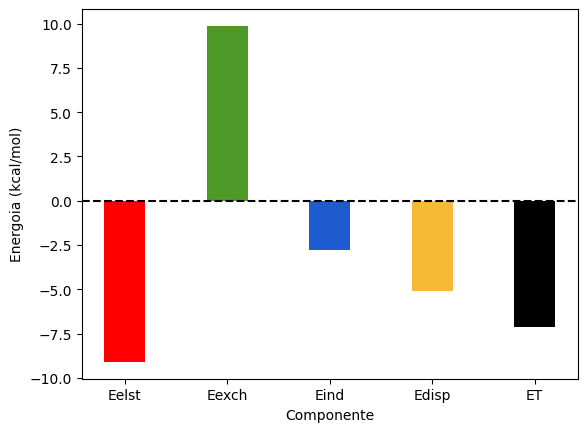

In [14]:
variables = ["Eelst", "Eexch", "Eind", "Edisp", "ET"]

# Get the values of the variables
values = [
    psi4.variable("SAPT ELST ENERGY") * 627.509,
    psi4.variable("SAPT EXCH ENERGY") * 627.509,
    psi4.variable("SAPT IND ENERGY") * 627.509,
    psi4.variable("SAPT DISP ENERGY") * 627.509,
    psi4.variable("SAPT0 TOTAL ENERGY") * 627.509,
]

# Create a list of colors
colors = ["red", "#4c9928", "#1d5bcf", "#f7ba36", "black"]
# Create a bar chart
plt.bar(variables, values, width=0.4, color=colors)
plt.axhline(y=0, color='black', linestyle='--')

# Set axis labels
plt.xlabel("Componente")
plt.ylabel("Energoia (kcal/mol)")

# Show the plot
plt.show()

*Questionamentos*

- A interação entre as hidroxilas é atrativa ou repulsiva?

- Qual é a componente dominante desta interação?

- A componente dominante foi a mesma que vimos no dímero de água e de ácido fluorídrico que estudamos anteriormente?